<a href="https://colab.research.google.com/github/minjeon99/ESAA_YB/blob/Week5/w5_fri_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **04. 분류**

## **01. 분류(Classification)의 개요**
- **지도학습**: **레이블(Label) = 명시적인 정답**이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
- **분류**
  - 지도학습의 대표적인 유형
  - 학습 데이터의 피처와 레이블값(결정 값, 클래스 값)의 패턴을 알고리즘으로 학습
  
    => 새로운 데이터 값이 주어졌을 때 미지의 레이블 값 예측
- **분류 알고리즘**
  - 나이브 베이즈
  - 로지스틱 회귀
  - 결정 트리
  - SVM
  - 최소 근접 알고리즘
  - 심층 연결 기반 신경망
  - 앙상블
- **앙상블(Ensemble Method)**
  - **배깅(Bagging)**
    - 랜덤 포레스트
  - **부스팅(Boosting)**
    - 그래디언트 부스팅(Gradient Bosting)
    - 그래디언트 부스팅을 발전시킨(수행 시간 단축) XgBoost, LightGBM 등

## **02. 결정 트리**
- **결정 트리(Decision Tree)**: 데이터에 있는 규칙을 학습 -> 트리 기반의 분류 규칙 생성
- 결정 트리의 구조
  - 규칙 노드(Decision Node): 규칙 조건
  - 리프 노드(Leaf Node): 결정된 클래스 값
  - 서브 트리(Sub Tree): 새로운 규칙 조건마다 생성
  - 많은 규칙 -> 분류 결정 복잡 => 과적합으로 이어지기 쉬움
  
    = 트리의 깊이(depth) 깊어질수록 예측 성능 저하될 가능성 높음

  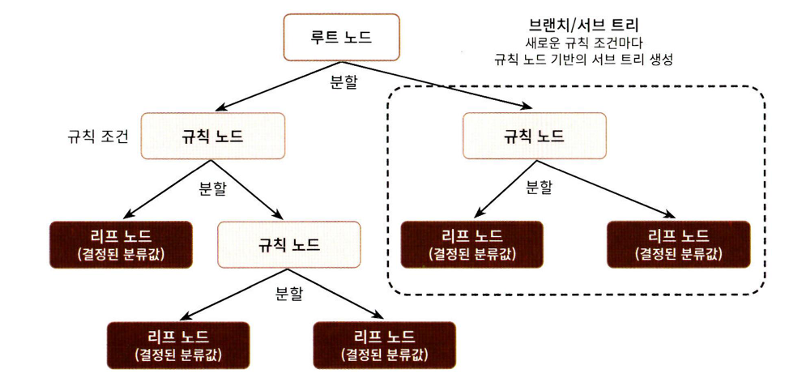

- **적은 결정 노드**로 **높은 예측 정확도** 갖도록
  - 많은 데이터 세트가 해당 분류에 속하도록 결정 노드의 규칙 설정
  - **균일한** 데이터 세트 구성하도록 트리 분할(Split)
- 균일한 데이터 세트: C > B > A

  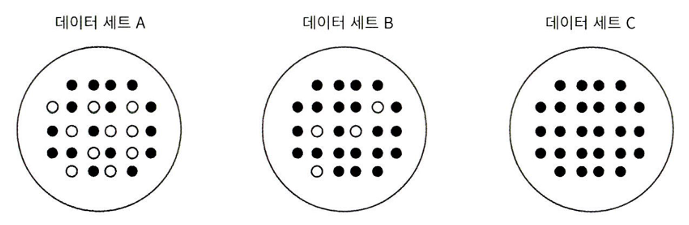
  - A: 혼잡도 높음
- 균일도는 데이터 구분에 필요한 정보의 양에 영향을 미친
  - C: 별다른 정보 없이 '검은 공' 예측 가능
  - A: 데이터 판단에 더 많은 정보 필요
- 결정 노드: 정보 균일도 높은 데이터 세트 먼저 선택하도록 규칙 노드 생성
- 정보의 균일도 측정 방식
  - **정보 이득(Information Garin)** = 1 - 엔트로피. 정보 이득 지수 높은 속성 기준으로 결정 트리가 분할 기준 결정.
    - **엔트로피**: 데이터 집합의 혼잡도. 다른 값이 섞여 있으면 높고, 같은 값이 섞여 있으면 낮음.
  - **지니 계수**: 경제학 - 불평등 지수 나타낼 때 사용. 머신러닝 - 지니 계수 낮을수록 균일도 높음 => 지니 계수 낮은 속성 기준 분할

  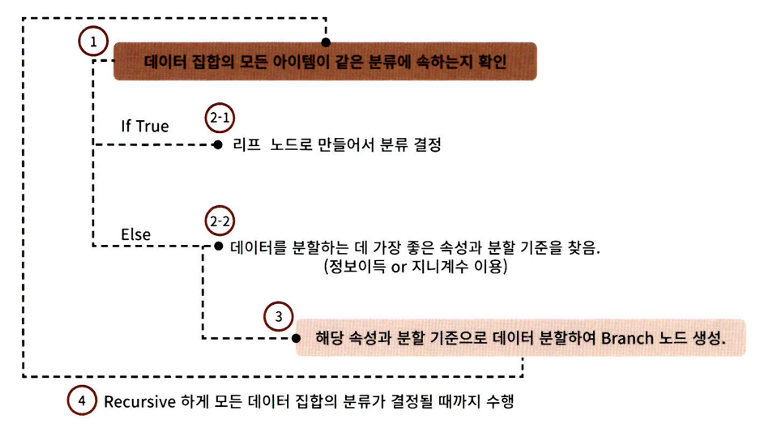

### **결정 트리 모델의 특징**
**장점**
- '균일도' 기반 => 알고리즘이 쉽고 직관적
  - 명확한 룰, 규칙 노드와 리프 노드 생성 과정 알 수 있음, 시각화 표현도 가능
  - 정보의 균일도만 신경 => 피처의 스케일링, 정규화 같은 전처리 필요 X

**단점**
- 과적합
  - 학습 데이터 기반 모델의 정확도 높이기 위해 계속 조건 추가 -> 트리 깊이 커짐
  
    => 복잡한 학습 모델 -> 예측 성능 떨어짐
  - 피처 많고 균일도 다양하게 존재할수록

  => 트리의 크기 사전 제한하는 것이 성능 튜닝에 더 도움 (모든 데이터 상황을 만족하는 완벽한 규칙은 만들 수 없음 인정)

### **결정 트리 파라미터**
- `DecisionTreeClassifier`: 결정 트리 알고리즘 - **분류**를 위한 클래스
- `DecisionTreeRegressor`: 결정 트리 알고리즘 - **회귀**를 위한 클래스
- **CART(Classifier And Regression Trees)**: 분류&회귀에 사용되는 트리 알고리즘
  - 사이킷런의 결정 트리 구현은 CART 알고리즘 기반

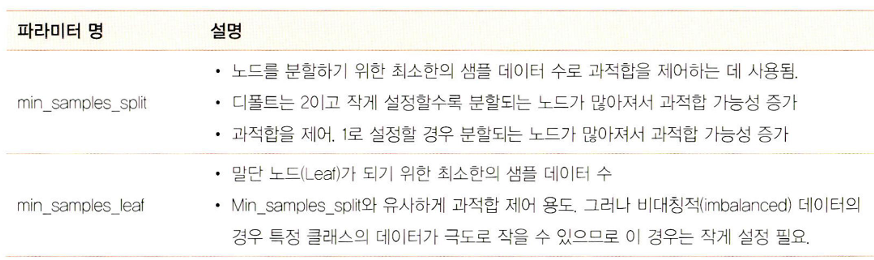

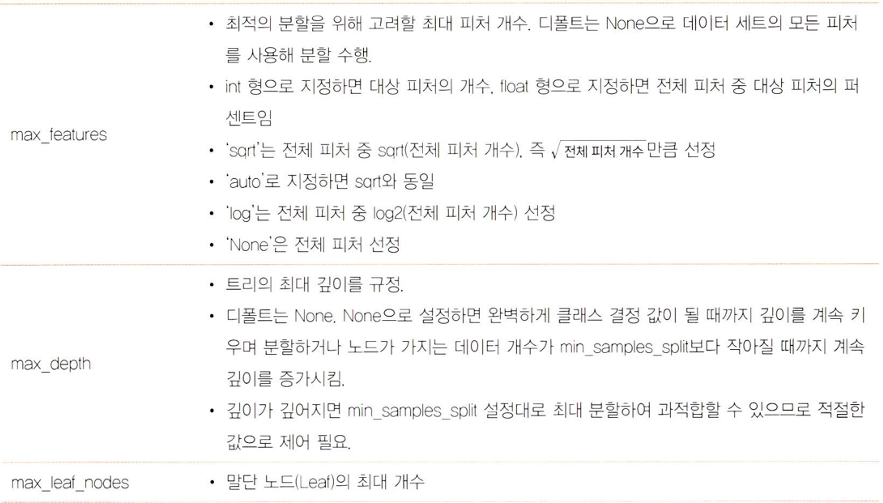

### **결정 트리 모델의 시각화**
- `Graphviz`: 그래프 기반의 dot 파일로 기술된 다양한 이미지 시각화하는 패키지
  - 파이썬으로 개발된 패키지 X => 파이썬 래퍼(Wrapper) 모듈 별도 설치
- `export_graphviz()`: Graphviz 패키지와 쉽게 인터페이스하도록 제공한 사이킷런 API
  - 학습 완료된 Estimator, 피처 이름 리스트, 레이블 이름 리스트 입력 -> 학습된 결정 트리 규칙을 실제 트리 형태로 시각화

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터 로딩, 학습/테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [ ]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

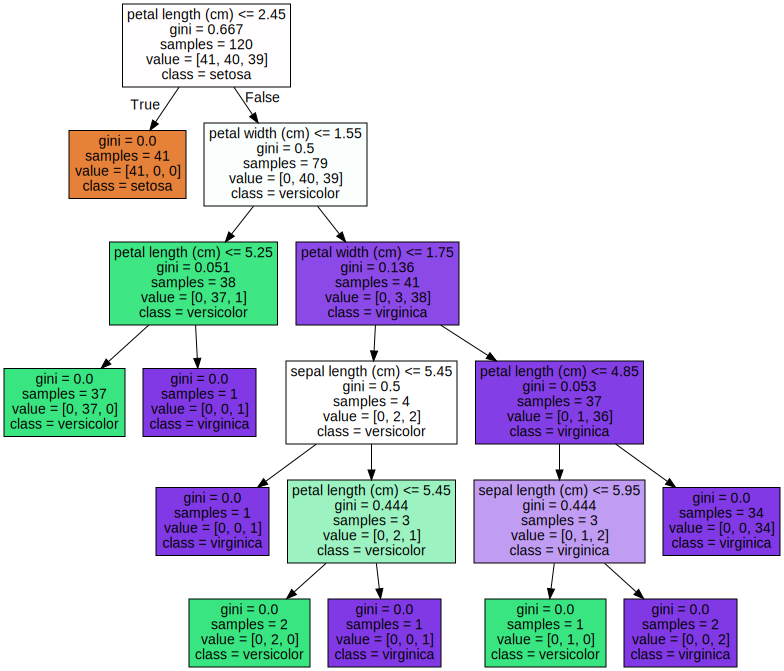

In [ ]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
  dot_graph = f.read()

graphviz.Source(dot_graph)

- **리프 노드**: 자식 노드 없는 노드. 최종 클래스(레이블) 값이 결정됨.
  - 오직 하나의 클래스 값으로 최종 데이터가 구성 or 리프 노드가 될 수 있는 하이퍼 파라미터 조건 충족
- **브랜치 노드**: 자식 노드가 있는 노드. 자식 노드를 만들기 위한 분할 규칙 조건 가짐.

**노드 내에 기술된 지표**
- **피처 조건** (e.g. **`petal length(cm) <= 2.45`**): 자식 노드를 만들기 위한 규칙 조건. 없으면 리프 노드
- **gini**: `value=[]`로 주어진 데이터 분포에서의 지니 계수
- **samples**: 현 규칙에 해당하는 데이터 건수
- **value = [ ]**: 클래스 값 기반 데이터 건수

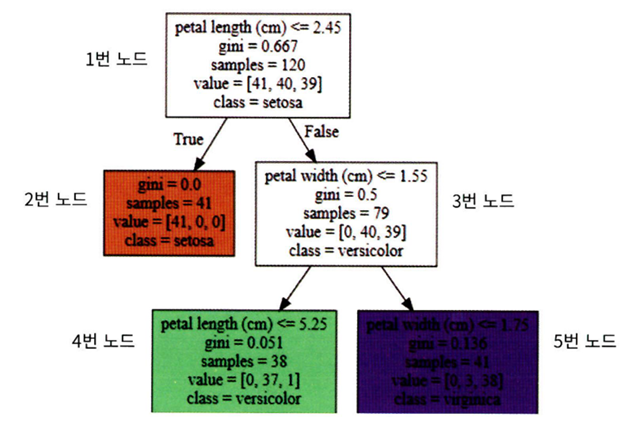
-

**1번 노드 = 루트 노드**
- class = setosa: 하위 노드 가질 경우 setosa의 개수가 가장 많음
- petal length (cm) <= 2.45 규칙의 True/False에 따라 분기 -> 2,3번 노드 생성

**2번 노드**
- 모든 데이터가 Setosa => 클래스 결정된 리프 노드

**3번 노드**
- Versicolor 40개, Virginica 39개 -> 지니 계수 0.5. 여전히 높음 => 다음 자식 브랜치 노드로 분기할 규칙 필요

**4번 노드**
- Versicolor 37개, Virginica 1개 => 대부분 versicolor
- 지니 계수 0.051. 매우 낮음 but 두 클래스 혼재 => 새 규칙으로 자식 노드 생성

**5번 노드**
- Versicolor 3개, Virginica 38개 => 대부분 virginica
- 지니 계수 0.136. 낮음 but 두 클래스 혼재 => 새 규칙으로 자식 노드 생성
---
- 각 노드의 색 -> 레이블 값 의미
  - 색 짙어질수록 지니 계수 낮음 & 해당 레이블에 속하는 샘플 데이터 많음
- 4번 노드: Virginica 단 1개, 나머지 Versicolor지만 구분하기 위해 다시 자식 노드 생성
  
  => 규칙 생성 로직 미리 제어하지 않으면 완벽하게 클래스 구별하기 위해 계속 트리 노드 생성 -> 복잡한 규칙 트리 => 과적합

**max_depth 하이퍼 파라미터 변경에 따른 규칙 트리 변화**
- `max_depth`: 결정 트리의 최대 트리 깊이 제어
- 트리 깊이 줄어들면 더 간단한 결정 트리 생성

  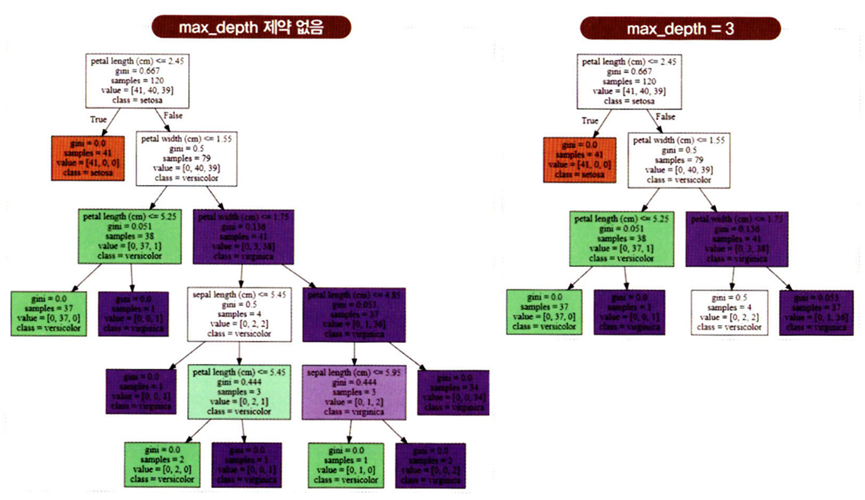

**min_samples_split 하이퍼 파라미터 변경에 따른 규칙 트리 변화**
- `min_samples_splits`: 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
- min_samples_splits=4 설정 -> 샘플이 3개인 경우 서로 상이한 클래스 값이 있어도 더 이상 분할하지 않고 리프 노드 됨

  => 트리 깊이 줄고, 더 간결한 결정 트리 생성

  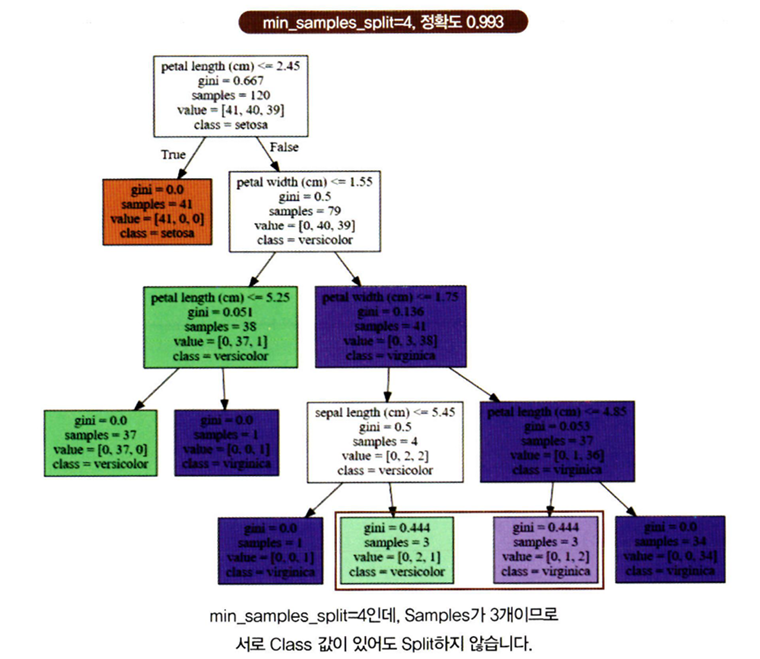

**min_samples_leaf 하이퍼 파라미터 변경에 따른 규칙 트리 변화**
- `min_samples_leaf`: 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값 지정
  - defalut: 1 -> 단독 클래스 or 1개의 데이터인 경우 리프 노드 가능
- min_samples_leaf 키우면 더 이상 분할하지 않고 리프 노드 될 수 있는 조건 완화

  => 리프 노드 만들기 위해 규칙 조건 변함(지니 계수 값이 크더라도 샘플 개수 조건 만족하도록) -> 브랜치 노드 감소, 간결한 결정 트리

  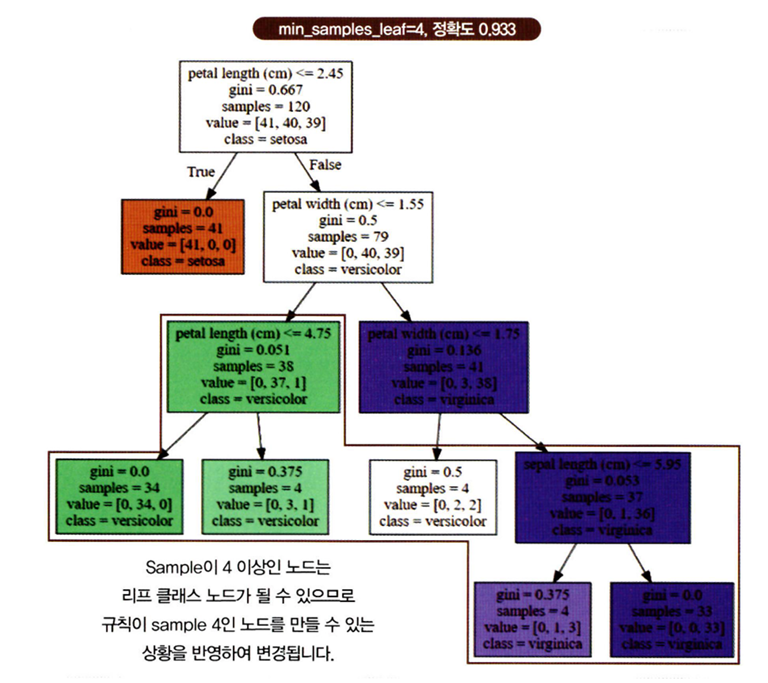

- 어떤 속성을 규칙 조건으로 선택하느냐가 중요한 요건
  - 명확한 규칙 트리 만드는 데 기여
  - 간결하고 이상치에 강한 모델 만듦
- `feature_importances_`: 결정 트리 알고리즘이 학습을 통해 규칙 정하는 데 피처의 중요한 역할 지표 제공하는 속성 (높을수록 중요도 높음)
  - ndarray
  - 피처 순서대로 값 할당

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


<Axes: >

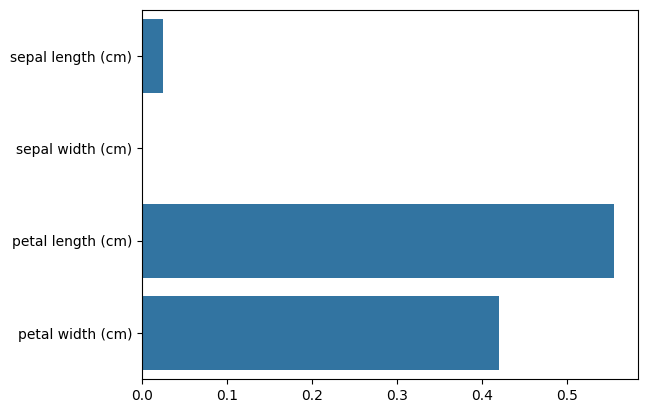

In [8]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names , dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column별 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### **결정 트리 과적합(Overfitting)**
- 결정 트리가 어떻게 학습 데이터 분할해 예측 수행하는지 & 과적합 문제 시각화하기
- `make_classification()`: 분류를 위한 데이터 세트 생성 함수

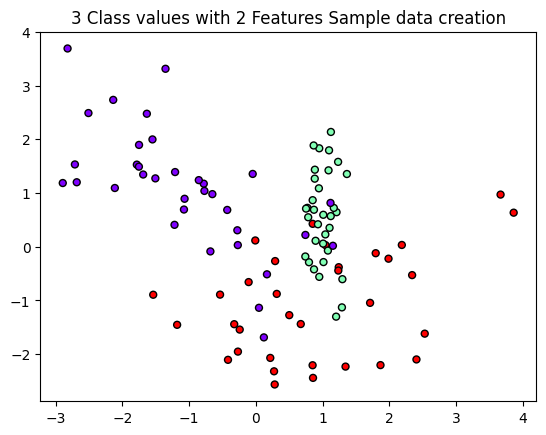

In [9]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")

# 2차원 시각화를 위해 feature 2개, 결정값 클래스 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_classes=3, n_clusters_per_class=1, random_state=0)

# plot 형태로 2개 feature를 2차원 좌표 시각화, 각 클래스값 다른 색깔로 표시.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

- 결정 트리 학습
  1. 제약 X, 디폴트 하이퍼 파라미터 사용

In [10]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이타로 model 학습 .
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

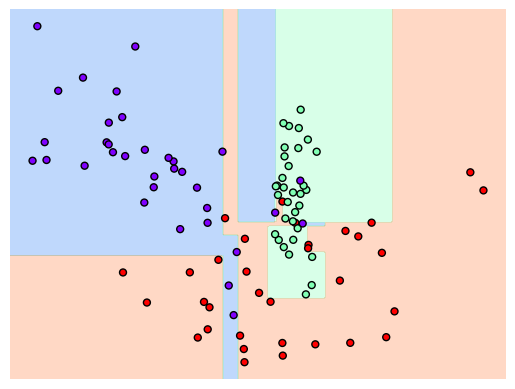

In [12]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 엄격한 분할 기준 -> 일부 이상치 데이터까지 분류하기 위해 분할 자주 발생. 결정 기준 경계 매우 많아짐.

  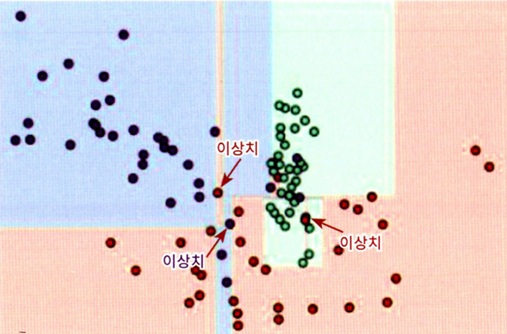

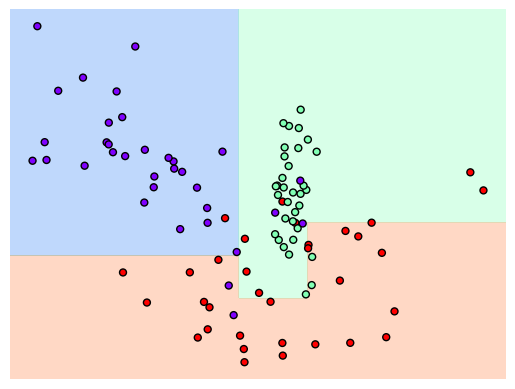

In [13]:
# min_samples_leaf=6으로 트리 생성 조건 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 이상치에 크게 반응하지 않으면서 일반화된 분류 규칙에 따라 분류

### **결정 트리 실습 - 사용자 행동 인식 데이터 세트**
- 사용자 행동 인식 데이터 세트: 30명에게 스마트폰 센서 장착 -> 동작 관련 여러 피처 수집. 어떤 동작인지 예측.

**데이터 로드 및 전처리**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일: 피처 이름 index, 피처명 공백으로 분리 -> DataFrame으로 로드
feature_name_df = pd.read_csv('./features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index 제거, 피처명만 리스트 객체로 생성 (샘플 10개 추출)
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- 인체 움직임 관련 속성의 평균/표준편차가 X,Y,Z축 값
- 중복된 피처명을 가짐 -> 원본 피처명에 _1,_2 추가로 부여

In [10]:
# 중복된 피처명 개수 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 42개 피처명 중복

In [11]:
# 원본 피처명에 _1/_2 추가해 새 DF 반환하는 함수 생성

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

- train/test DataFrame 로드
  - 공백 문자로 분리
  - 레이블 칼럼: 'action'

In [20]:
import pandas as pd

def get_human_dataset( ):

    # 각 데이터 파일: 공백으로 분리 => 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

    # 중복된 피처명 수정하는 get_new_feature_name_df() -> 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습/테스트 피처 데이터 DataFrame 로딩. 컬럼명: feature_name
    X_train = pd.read_csv('./X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./X_test.txt',sep='\s+', names=feature_name)

    # 학습/테스트 레이블 데이터 DataFrame 로딩. 컬럼명: action
    y_train = pd.read_csv('./y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./y_test.txt',sep='\s+',header=None,names=['action'])

    # 학습/테스트용 DataFrame 반환
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [21]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


- 레코드: 7352
- 피처: 561
  - 전부 float형 숫자형 -> 카테고리 인코딩 필요 X

In [22]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


- 레이블 값 6개
- 왜곡되지 않고 비교적 고르게 분포

**결정 트리를 이용한 동작 예측 분류**

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


- 정확도: 약 85.48%

**트리 깊이와 예측 정확도**
- `GridSearchCV` 이용 -> `max_depth` 변화시키면서 예측 성능 확인

In [25]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치: 0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


- max_depth:16일 때 최고 평균 정확도 약 85.13%

**max_depth에 따른 예측 성능 변화**
- `cv_results_`: CV 세트에 하이퍼 파라미터 순차적으로 입력했을 떄의 성능 수치

In [26]:
# GridSearchCV 객체의 cv_results_ 속성 DataFrame 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 테스트/학습 데이터 세트 정확도 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


- 전체적으로 10개까지 수치 증가하다가 하락하는 양상 (16개에서 가장 높긴 함)

In [28]:
# 별도의 테스트 데이터 세트에서 max_depth 변화에 따른 값 측정

max_depths = [6,8,10,12,16,20,24]
# max_depth 값 변화시키면서 학습/테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print('max_depth={0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth=6 정확도: 0.8558
max_depth=8 정확도: 0.8707
max_depth=10 정확도: 0.8673
max_depth=12 정확도: 0.8646
max_depth=16 정확도: 0.8575
max_depth=20 정확도: 0.8548
max_depth=24 정확도: 0.8548


- max_depth 8일 때 약 87.07%로 가장 높은 정확도
- 8 넘어가면 정확도 계속 감소

In [29]:
# max_depth와 min_samples_split 같이 변경하면서 성능 튜닝
params = {'max_depth':[8,12,16,20],
          'min_samples_split':[16,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


- max_depth=8, min_samples_split=16일 때 최고 정확도 약 85.49%
- `best_estimator_`: 최적 하이퍼 파라미터로 학습 완료된 Estimator 객체

In [34]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

결정 트리 예측 정확도: 0.8717


**각 피처 중요도 시각화**

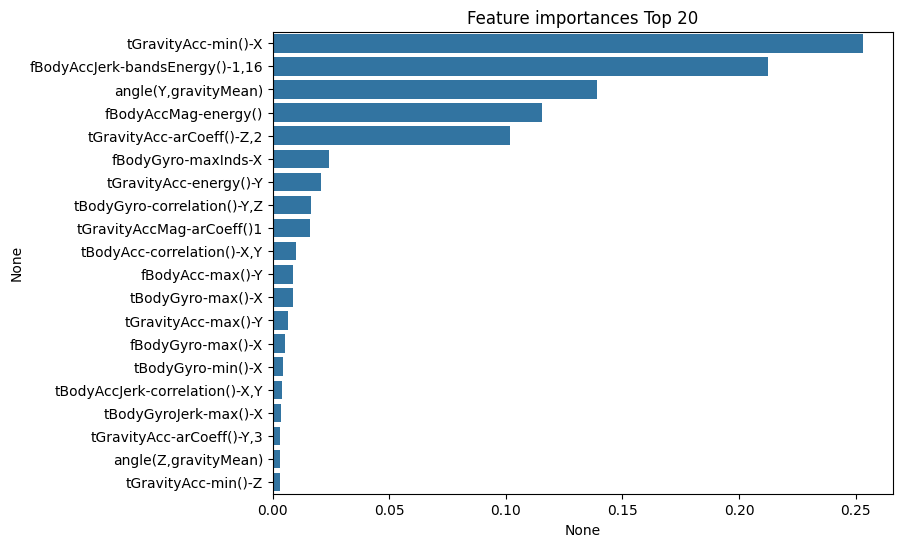

In [36]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_

# Top 중요도 정렬, Seaborn 막대그래프 표현 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

# 중요도 순 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()